 <table width=100%>
<tr>
    <td><h1 style="text-align: left; font-size:300%;">
        Clustering Project
    </h1></td>
    <td width="25%">
    <div style="text-align: right">
    <b> Machine Learning 2022</b> <br>
    <b>Project 3 <br>

</tr>
</table>

# Table of contents

1. Aim and objectives of the project
2. Exploratory Data Analysis
3. Data Preprocessing
4. Data Modelling
5. Results, discussion and conclusion

---
---

# 1. Aim and objectives of the project

The aim of this project is to assess if unsupervised methods are able to detect pattern in our data and to group similar instances between them. The samples originally belong to specific classes, so the evaluation is performed checking the original classes.
We will then compare the performance of different clustering algorithms.

 # 2. Exploratory Data Analysis

### Mice Protein Expression Data Set description

The data set consists of the expression levels of **77 proteins/protein modifications** that produced detectable signals in the **nuclear fraction of cortex**. There are **38 control mice** and **34 trisomic mice** (Down syndrome), for a total of **72 mice**.\
In the experiments, **15 measurements** were registered of each protein per sample/mouse. Therefore, for control mice, there are 38x15, or **570 measurements**, and for trisomic mice, there are 34x15, or **510 measurements**.\
The dataset contains a total of 1080 measurements per protein. Each measurement can be considered as an independent sample/mouse.

There are **8 classes of mice**, described based on features such as **genotype, behavior and treatment**.\
**According to genotype**, mice can be control or trisomic. **According to behavior**, some mice have been stimulated to learn (context-shock) and others have not (shock-context) and in order to **assess the effect of the drug** memantine in recovering the ability to learn in trisomic mice, some mice have been injected with the drug and others have not.

Classes:
- c-CS-s: control mice, stimulated to learn, injected with saline (9 mice)
- c-CS-m: control mice, stimulated to learn, injected with memantine (10 mice)
- c-SC-s: control mice, not stimulated to learn, injected with saline (9 mice)
- c-SC-m: control mice, not stimulated to learn, injected with memantine (10 mice)

- t-CS-s: trisomy mice, stimulated to learn, injected with saline (7 mice)
- t-CS-m: trisomy mice, stimulated to learn, injected with memantine (9 mice)
- t-SC-s: trisomy mice, not stimulated to learn, injected with saline (9 mice)
- t-SC-m: trisomy mice, not stimulated to learn, injected with memantine (9 mice)

We import the packages useful to our analysis

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import sklearn
import scipy
import statsmodels.api as sm


np.random.seed(42)

### Dataset Visualization

We read and visualize the dataset, creating a pandas DataFrame.

In [2]:
cortex_data = pd.read_excel("Data_Cortex_Nuclear.xls")
cortex_data.head()

MouseID  DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N  \
0   309_1  0.503644  0.747193  0.430175  2.816329  5.990152  0.218830   
1   309_2  0.514617  0.689064  0.411770  2.789514  5.685038  0.211636   
2   309_3  0.509183  0.730247  0.418309  2.687201  5.622059  0.209011   
3   309_4  0.442107  0.617076  0.358626  2.466947  4.979503  0.222886   
4   309_5  0.434940  0.617430  0.358802  2.365785  4.718679  0.213106   

    pBRAF_N  pCAMKII_N   pCREB_N  ...   pCFOS_N     SYP_N  H3AcK18_N  \
0  0.177565   2.373744  0.232224  ...  0.108336  0.427099   0.114783   
1  0.172817   2.292150  0.226972  ...  0.104315  0.441581   0.111974   
2  0.175722   2.283337  0.230247  ...  0.106219  0.435777   0.111883   
3  0.176463   2.152301  0.207004  ...  0.111262  0.391691   0.130405   
4  0.173627   2.134014  0.192158  ...  0.110694  0.434154   0.118481   

     EGR1_N  H3MeK4_N    CaNA_N  Genotype  Treatment  Behavior   class  
0  0.131790  0.128186  1.675652   Control  Memantine       C/S  c-CS-m  
1  0.135103  0.131119  1.743610   Control  Memantine       C/S  c-CS-m  
2  0.133362  0.127431  1.926427   Control  Memantine       C/S  c-CS-m  
3  0.147444  0.146901  1.700563   Control  Memantine       C/S  c-CS-m  
4  0.140314  0.148380  1.839730   Control  Memantine       C/S  c-CS-m  

[5 rows x 82 columns]

We print information on index dtypes, columns, and non-null values.

In [3]:
cortex_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MouseID          1080 non-null   object 
 1   DYRK1A_N         1077 non-null   float64
 2   ITSN1_N          1077 non-null   float64
 3   BDNF_N           1077 non-null   float64
 4   NR1_N            1077 non-null   float64
 5   NR2A_N           1077 non-null   float64
 6   pAKT_N           1077 non-null   float64
 7   pBRAF_N          1077 non-null   float64
 8   pCAMKII_N        1077 non-null   float64
 9   pCREB_N          1077 non-null   float64
 10  pELK_N           1077 non-null   float64
 11  pERK_N           1077 non-null   float64
 12  pJNK_N           1077 non-null   float64
 13  PKCA_N           1077 non-null   float64
 14  pMEK_N           1077 non-null   float64
 15  pNR1_N           1077 non-null   float64
 16  pNR2A_N          1077 non-null   float64
 17  pNR2B_N       

### Missing values

We print the top 10 columns for total missing values

In [4]:
# Top 10 columns for total missing values
(
    cortex_data.isna().sum()*100/cortex_data.isna().sum().sum()
).sort_values(ascending=False).head(10)

BCL2_N        20.415473
H3MeK4_N      19.340974
BAD_N         15.257880
EGR1_N        15.042980
H3AcK18_N     12.893983
pCFOS_N        5.372493
ELK_N          1.289398
Bcatenin_N     1.289398
MEK_N          0.501433
P38_N          0.214900
dtype: float64

We will remove from the dataset columns with more than 10% of missing values (which results in 5 variables) and we replace the remaining null values with their mean. We also remove the ID column as non informative since it's just an identifier of the mouse.

In [5]:
(cortex_data=='None').any().any()

False

In [6]:
cortex_data = cortex_data.fillna(cortex_data.mean(numeric_only=True))

In [7]:
cortex_data.drop(['BAD_N', 'BCL2_N', 'H3AcK18_N', 'EGR1_N','H3MeK4_N','MouseID'], inplace=True, axis=1)
cortex_data.head()

DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N   pBRAF_N  \
0  0.503644  0.747193  0.430175  2.816329  5.990152  0.218830  0.177565   
1  0.514617  0.689064  0.411770  2.789514  5.685038  0.211636  0.172817   
2  0.509183  0.730247  0.418309  2.687201  5.622059  0.209011  0.175722   
3  0.442107  0.617076  0.358626  2.466947  4.979503  0.222886  0.176463   
4  0.434940  0.617430  0.358802  2.365785  4.718679  0.213106  0.173627   

   pCAMKII_N   pCREB_N    pELK_N  ...  pGSK3B_Tyr216_N     SHH_N     pS6_N  \
0   2.373744  0.232224  1.750936  ...         0.831557  0.188852  0.106305   
1   2.292150  0.226972  1.596377  ...         0.849270  0.200404  0.106592   
2   2.283337  0.230247  1.561316  ...         0.846709  0.193685  0.108303   
3   2.152301  0.207004  1.595086  ...         0.833277  0.192112  0.103184   
4   2.134014  0.192158  1.504230  ...         0.878668  0.205604  0.104784   

    pCFOS_N     SYP_N    CaNA_N  Genotype  Treatment  Behavior   class  
0  0.108336  0.427099  1.675652   Control  Memantine       C/S  c-CS-m  
1  0.104315  0.441581  1.743610   Control  Memantine       C/S  c-CS-m  
2  0.106219  0.435777  1.926427   Control  Memantine       C/S  c-CS-m  
3  0.111262  0.391691  1.700563   Control  Memantine       C/S  c-CS-m  
4  0.110694  0.434154  1.839730   Control  Memantine       C/S  c-CS-m  

[5 rows x 76 columns]

We check for the frequencies of the categorical variables.

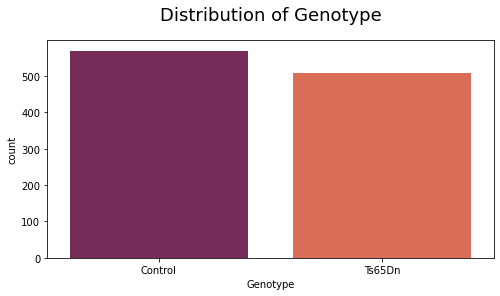

Control    570
Ts65Dn     510
Name: Genotype, dtype: int64


In [8]:
plt.figure(figsize=(8, 4)) 
ax = sns.countplot(x='Genotype',data=cortex_data, palette='rocket')
ax.set_title('Distribution of Genotype', fontsize=18, pad=20)
plt.show()
print(cortex_data['Genotype'].value_counts())

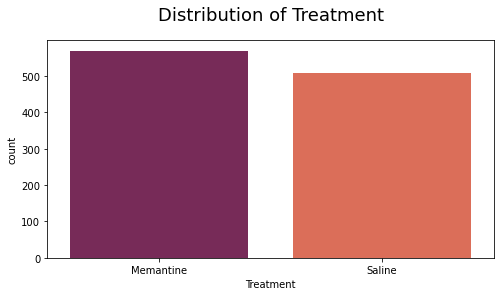

Memantine    570
Saline       510
Name: Treatment, dtype: int64


In [9]:
plt.figure(figsize=(8, 4)) 
ax = sns.countplot(x='Treatment',data=cortex_data, palette='rocket')
ax.set_title('Distribution of Treatment', fontsize=18, pad=20)
plt.show()
print(cortex_data['Treatment'].value_counts())

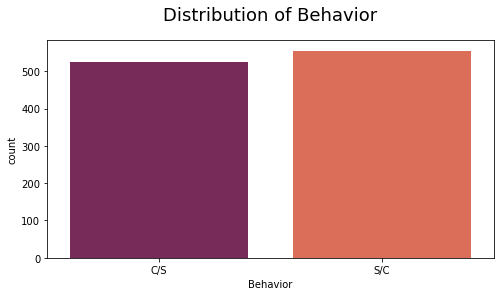

S/C    555
C/S    525
Name: Behavior, dtype: int64


In [10]:
plt.figure(figsize=(8, 4)) 
ax = sns.countplot(x='Behavior',data=cortex_data, palette='rocket')
ax.set_title('Distribution of Behavior', fontsize=18, pad=20)
plt.show()
print(cortex_data['Behavior'].value_counts())

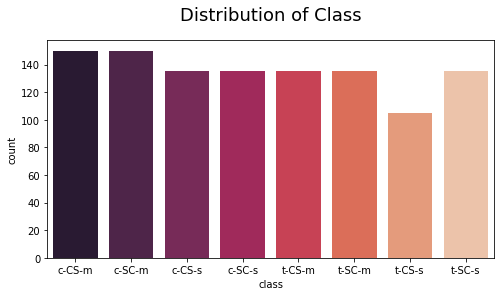

c-CS-m    150
c-SC-m    150
c-CS-s    135
c-SC-s    135
t-CS-m    135
t-SC-m    135
t-SC-s    135
t-CS-s    105
Name: class, dtype: int64


In [11]:
plt.figure(figsize=(8, 4)) 
ax = sns.countplot(x='class',data=cortex_data, palette='rocket')
ax.set_title('Distribution of Class', fontsize=18, pad=20)
plt.show()
print(cortex_data['class'].value_counts())

In [12]:
cortex_data.describe(include='object')

Genotype  Treatment Behavior   class
count      1080       1080     1080    1080
unique        2          2        2       8
top     Control  Memantine      S/C  c-CS-m
freq        570        570      555     150

# 3. Data Preprocessing

In this section we will:

- split the dataset into features and classes. The analysis is performed only with the features and the resultus will be compared to the original classes
- Conversion of categorical values into numerical ones.
- Scaling to arrange PCA
- PCA. In our case, it's useful as we have a high cardinality of the features (78 columns). We thus want to reduce the dimensionality without loosing too much information.

We will end up with two datasets, one with PCA, and the other without pre-processing.
The results of the clustering will then be compared on those two datasets to first detect any differences and to further justify the pre-processing techniques.

### Dataframe split

In [13]:
data = cortex_data.drop('class',axis=1)
y = cortex_data['class']

### Numerical encoding of classes

In [14]:
class_mapping = {"c-CS-m": 0, "c-SC-m": 1, 'c-CS-s': 2,
                 'c-SC-s': 3, 't-CS-m':4, 't-SC-m':5,
                 't-SC-s':6, 't-CS-s':7}
y = y.map(class_mapping)
y

0       0
1       0
2       0
3       0
4       0
       ..
1075    6
1076    6
1077    6
1078    6
1079    6
Name: class, Length: 1080, dtype: int64

### Creation of dummy variables to tranform variables from  categorical to numerical 

In [15]:
data = pd.get_dummies(data=data, columns=["Treatment","Behavior", "Genotype"])

In [16]:
data.head()

DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N   pBRAF_N  \
0  0.503644  0.747193  0.430175  2.816329  5.990152  0.218830  0.177565   
1  0.514617  0.689064  0.411770  2.789514  5.685038  0.211636  0.172817   
2  0.509183  0.730247  0.418309  2.687201  5.622059  0.209011  0.175722   
3  0.442107  0.617076  0.358626  2.466947  4.979503  0.222886  0.176463   
4  0.434940  0.617430  0.358802  2.365785  4.718679  0.213106  0.173627   

   pCAMKII_N   pCREB_N    pELK_N  ...     pS6_N   pCFOS_N     SYP_N    CaNA_N  \
0   2.373744  0.232224  1.750936  ...  0.106305  0.108336  0.427099  1.675652   
1   2.292150  0.226972  1.596377  ...  0.106592  0.104315  0.441581  1.743610   
2   2.283337  0.230247  1.561316  ...  0.108303  0.106219  0.435777  1.926427   
3   2.152301  0.207004  1.595086  ...  0.103184  0.111262  0.391691  1.700563   
4   2.134014  0.192158  1.504230  ...  0.104784  0.110694  0.434154  1.839730   

   Treatment_Memantine  Treatment_Saline  Behavior_C/S  Behavior_S/C  \
0                    1                 0             1             0   
1                    1                 0             1             0   
2                    1                 0             1             0   
3                    1                 0             1             0   
4                    1                 0             1             0   

   Genotype_Control  Genotype_Ts65Dn  
0                 1                0  
1                 1                0  
2                 1                0  
3                 1                0  
4                 1                0  

[5 rows x 78 columns]

### Scaling for further analyses involving distances
This is done to avoid that the features have different weights 


In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

data_scaled = scaler.fit_transform(data)
data_scaled = pd.DataFrame(data_scaled)
data_scaled.head()

0         1         2         3         4         5         6   \
0  0.151122  0.212885  0.824638  0.612119  0.630482  0.327006  0.448666   
1  0.155750  0.188226  0.776455  0.601070  0.585247  0.311887  0.429899   
2  0.153459  0.205696  0.793572  0.558911  0.575910  0.306369  0.441381   
3  0.125169  0.157688  0.637326  0.468152  0.480646  0.335530  0.444307   
4  0.122146  0.157838  0.637787  0.426467  0.441977  0.314976  0.433100   

         7         8         9   ...        68        69        70        71  \
0  0.168257  0.617322  0.232553  ...  0.426816  0.133930  0.336299  0.705738   
1  0.154925  0.590173  0.205362  ...  0.429952  0.110434  0.365208  0.749771   
2  0.153485  0.607102  0.199194  ...  0.448652  0.121560  0.353621  0.868229   
3  0.132074  0.486945  0.205135  ...  0.392700  0.151031  0.265619  0.721879   
4  0.129086  0.410194  0.189152  ...  0.410187  0.147711  0.350381  0.812053   

    72   73   74   75   76   77  
0  1.0  0.0  1.0  0.0  1.0  0.0  
1  1.0  0.0  1.0  0.0  1.0  0.0  
2  1.0  0.0  1.0  0.0  1.0  0.0  
3  1.0  0.0  1.0  0.0  1.0  0.0  
4  1.0  0.0  1.0  0.0  1.0  0.0  

[5 rows x 78 columns]

In [18]:
data_scaled.shape

(1080, 78)

### PCA for reducing dimensionality

As we can see in the graph, if we retain the first 10 components, we will preserve 90% of the information of the dataset.

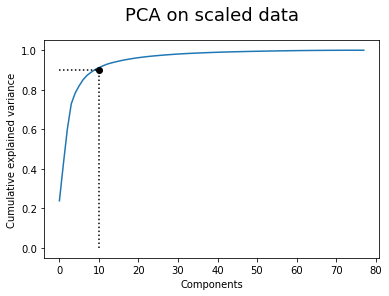

In [19]:
from sklearn.decomposition import PCA

pca = PCA().fit(data_scaled) 
plt.plot(np.cumsum(pca.explained_variance_ratio_)) 
# Plot righe tratteggiate alle coordinate specificate
plt.plot([10, 10], [0, 0.9], "k:")
plt.plot([0, 10], [0.9, 0.9], "k:")
plt.plot(10, 0.9, "ko")
plt.title('PCA on scaled data', fontsize=18, pad=20)
plt.xlabel('Components') 
plt.ylabel('Cumulative explained variance'); 
plt.show()

In [20]:
pca = PCA(n_components=10)
data_reduced = pd.DataFrame(pca.fit_transform(data_scaled))
data_reduced

0         1         2         3         4         5         6  \
0    -0.804618 -1.007160 -0.247581  0.778632  0.147387  0.157779 -0.465891   
1    -0.822809 -1.002333 -0.257711  0.560512 -0.007520  0.112855 -0.401401   
2    -0.846543 -0.996492 -0.255868  0.580265 -0.069046  0.074006 -0.376720   
3    -0.811094 -0.998073 -0.297292  0.187433  0.257192 -0.058985 -0.405636   
4    -0.835360 -0.997919 -0.301208  0.061322  0.063602 -0.115900 -0.356938   
...        ...       ...       ...       ...       ...       ...       ...   
1075  0.372420  1.289522  0.328571 -0.688797 -0.350021 -0.351098  0.161147   
1076  0.397887  1.277402  0.333575 -0.605006 -0.264677 -0.375590  0.192753   
1077  0.362441  1.275392  0.307007 -1.060769 -0.503329 -0.460916  0.416795   
1078  0.417333  1.277116  0.316119 -0.918314 -0.513620 -0.461940  0.480810   
1079  0.475601  1.278054  0.318641 -0.490724 -0.220427 -0.487339  0.453750   

             7         8         9  
0     0.166150  0.108112  0.034328  
1     0.169619  0.101175  0.048300  
2     0.222622  0.116992  0.038166  
3     0.164997  0.039598  0.018852  
4     0.133716  0.011362  0.079236  
...        ...       ...       ...  
1075  0.107339  0.380094  0.201123  
1076  0.164278  0.356309  0.229004  
1077  0.093641  0.349035  0.194168  
1078  0.029877  0.321108  0.283548  
1079  0.103484  0.318213  0.328533  

[1080 rows x 10 columns]

In [21]:
# OverviewDataframe final

print('Original data')
display(data.head())

print('PCA data')
display(data_reduced.head())

Original data


DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N   pBRAF_N  \
0  0.503644  0.747193  0.430175  2.816329  5.990152  0.218830  0.177565   
1  0.514617  0.689064  0.411770  2.789514  5.685038  0.211636  0.172817   
2  0.509183  0.730247  0.418309  2.687201  5.622059  0.209011  0.175722   
3  0.442107  0.617076  0.358626  2.466947  4.979503  0.222886  0.176463   
4  0.434940  0.617430  0.358802  2.365785  4.718679  0.213106  0.173627   

   pCAMKII_N   pCREB_N    pELK_N  ...     pS6_N   pCFOS_N     SYP_N    CaNA_N  \
0   2.373744  0.232224  1.750936  ...  0.106305  0.108336  0.427099  1.675652   
1   2.292150  0.226972  1.596377  ...  0.106592  0.104315  0.441581  1.743610   
2   2.283337  0.230247  1.561316  ...  0.108303  0.106219  0.435777  1.926427   
3   2.152301  0.207004  1.595086  ...  0.103184  0.111262  0.391691  1.700563   
4   2.134014  0.192158  1.504230  ...  0.104784  0.110694  0.434154  1.839730   

   Treatment_Memantine  Treatment_Saline  Behavior_C/S  Behavior_S/C  \
0                    1                 0             1             0   
1                    1                 0             1             0   
2                    1                 0             1             0   
3                    1                 0             1             0   
4                    1                 0             1             0   

   Genotype_Control  Genotype_Ts65Dn  
0                 1                0  
1                 1                0  
2                 1                0  
3                 1                0  
4                 1                0  

[5 rows x 78 columns]

PCA data


0         1         2         3         4         5         6  \
0 -0.804618 -1.007160 -0.247581  0.778632  0.147387  0.157779 -0.465891   
1 -0.822809 -1.002333 -0.257711  0.560512 -0.007520  0.112855 -0.401401   
2 -0.846543 -0.996492 -0.255868  0.580265 -0.069046  0.074006 -0.376720   
3 -0.811094 -0.998073 -0.297292  0.187433  0.257192 -0.058985 -0.405636   
4 -0.835360 -0.997919 -0.301208  0.061322  0.063602 -0.115900 -0.356938   

          7         8         9  
0  0.166150  0.108112  0.034328  
1  0.169619  0.101175  0.048300  
2  0.222622  0.116992  0.038166  
3  0.164997  0.039598  0.018852  
4  0.133716  0.011362  0.079236

# 4. Data Modelling

The aim of data modelling is to assess if unsupervised methods can detect pattern in the data that allow to cluster similar instances.

The evaluation will be carried out checking if the detected clusters are homogenous according to the silhouette score.

We will then compare two clustering algorithms. Hierarchical clustering and k-means clustering, on both PCA data and original data.


## Hierarchical Clustering

Hierarchical clustering (or Agglomerative clustering) is a clustering technique that works by partitioning the points iteratively. A **bottom-up** approach starts by considering singleton clusters (i.e., clusters containing only one sample) and then iteratively merges together the two most similar clusters.

This iterative approach, while in some cases less efficient, allows us to reconstruct the sequence of merges and to build a hierarchy of clusters which is usually called **dendrogram**.

### Agglomerative Clustering

In [22]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score


clusters = list(range(2, 10))

def run_experiment(range_clusters, model, data):
    result = []
    for cluster in range_clusters:
        model.set_params(**{'n_clusters': cluster})
        y_pred = model.fit_predict(data)
        result.append(silhouette_score(data, y_pred))
        
    return result

In [23]:
# Agglomerative
model = AgglomerativeClustering(affinity='euclidean', linkage='ward')
results_original_df = run_experiment(clusters, model=model, data=data)
results_pca_df = run_experiment(clusters, model=model, data=data_reduced)

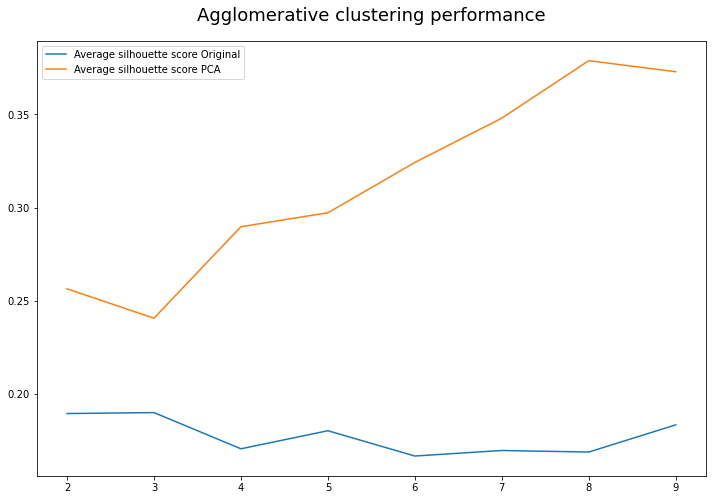

In [24]:
plt.figure(figsize=(12, 8)) 
ax = sns.lineplot(x=clusters, y=results_original_df, label='Average silhouette score Original')
ax = sns.lineplot(x=clusters, y=results_pca_df, label='Average silhouette score PCA')
ax.set_title('Agglomerative clustering performance', fontsize=18, pad=20)
plt.show()

The graphic shows that post-PCA there are 8 suggested clusters, which are consistent with the number of original classes.

### Plotting the Dendrogram

Starting from the linkage matrix, we can plot in scikit-learn the **dendrogram** using the `cluster.hierarchy.dendrogram` method. 

In the following function we plot the dendrogram and **add some additional information on the dendrogram intersections**. 
In particular, we mark intersection with their linkage row id, so that we can optionally inspect which nodes are under that part of the dendrogram!

**NOTE:** we chose to identify nodes by negative numbers: $-1$ is the last merge, $-2$ is the last but one merge and so on.

In [25]:
from scipy.cluster.hierarchy import dendrogram, linkage

def plot_dendrogram(Z=None, model=None, X=None, **kwargs):
    annotate_above = kwargs.pop('annotate_above', 0)

    # Reconstruct the linakge matrix if the standard model API was used
    if Z is None:
        if hasattr(model, 'distances_') and model.distances_ is not None:
            # create the counts of samples under each node
            counts = np.zeros(model.children_.shape[0])
            n_samples = len(model.labels_)
            for i, merge in enumerate(model.children_):
                current_count = 0
                for child_idx in merge:
                    if child_idx < n_samples:
                        current_count += 1  # leaf node
                    else:
                        current_count += counts[child_idx - n_samples]
                counts[i] = current_count

            Z = np.column_stack([model.children_, model.distances_,
                                              counts]).astype(float)
        else:
            Z = linkage(X, method=model.linkage, metric=model.affinity)
    
    if 'n_clusters' in kwargs:
        n_clusters = kwargs.pop('n_clusters')
        # Set the cut point just above the last but 'n_clusters' merge
        kwargs['color_threshold'] = Z[-n_clusters, 2] + 1e-6
        #kwargs['color_threshold'] = None
    
    fig = plt.figure(figsize=(20,10))
    ax = fig.add_subplot(111)
    # Plot the corresponding dendrogram
    ddata = dendrogram(Z, ax=ax, **kwargs)
    
    # Annotate nodes in the dendrogram
    for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
        x = 0.5 * sum(i[1:3])
        y = d[1]
        nid = np.where(Z[:,2] == y)[0][0]
        if y > annotate_above:
            plt.plot(x, y, 'o', c=c)
            plt.annotate(str(nid-Z.shape[0]), (x, y), xytext=(0, -5),
                         textcoords='offset points',
                         va='top', ha='center')
    if kwargs['color_threshold']:
        plt.axhline(y=kwargs['color_threshold'], c='k')
    
    return fig, ax

Original dataset


(<Figure size 1440x720 with 1 Axes>, <AxesSubplot:>)

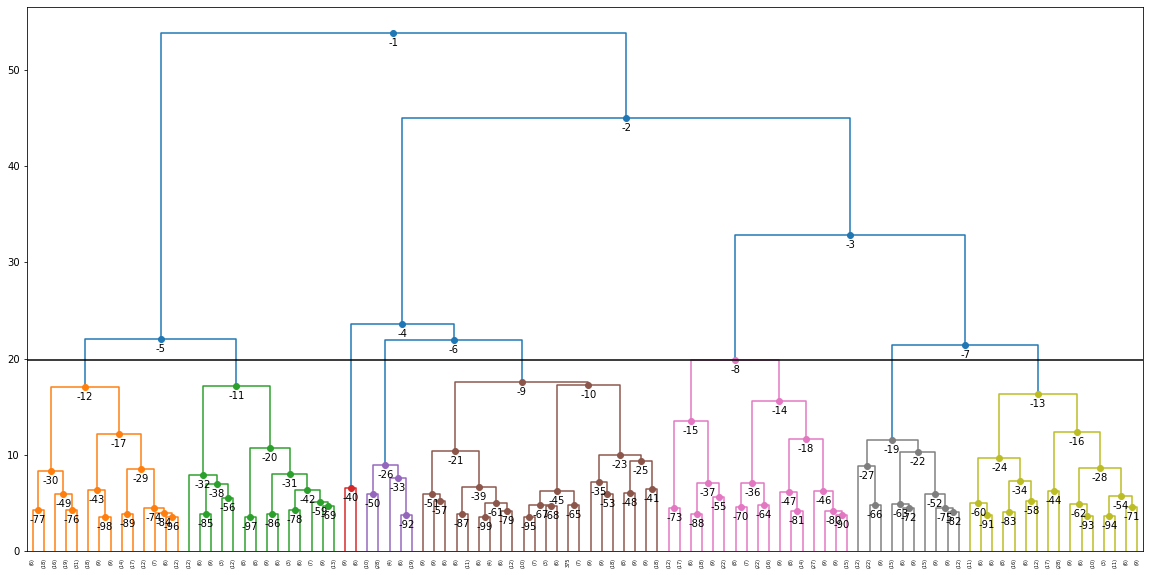

In [26]:
# Original dataset
n_clusters=8

model = AgglomerativeClustering(n_clusters=n_clusters, distance_threshold=None, affinity='euclidean', linkage='ward')

y_predict_original = model.fit_predict(data)

print("Original dataset")
plot_dendrogram(model=model, X=data, truncate_mode='lastp', p=100, 
                n_clusters=n_clusters, 
                color_threshold=None)

Reduced dataset


(<Figure size 1440x720 with 1 Axes>, <AxesSubplot:>)

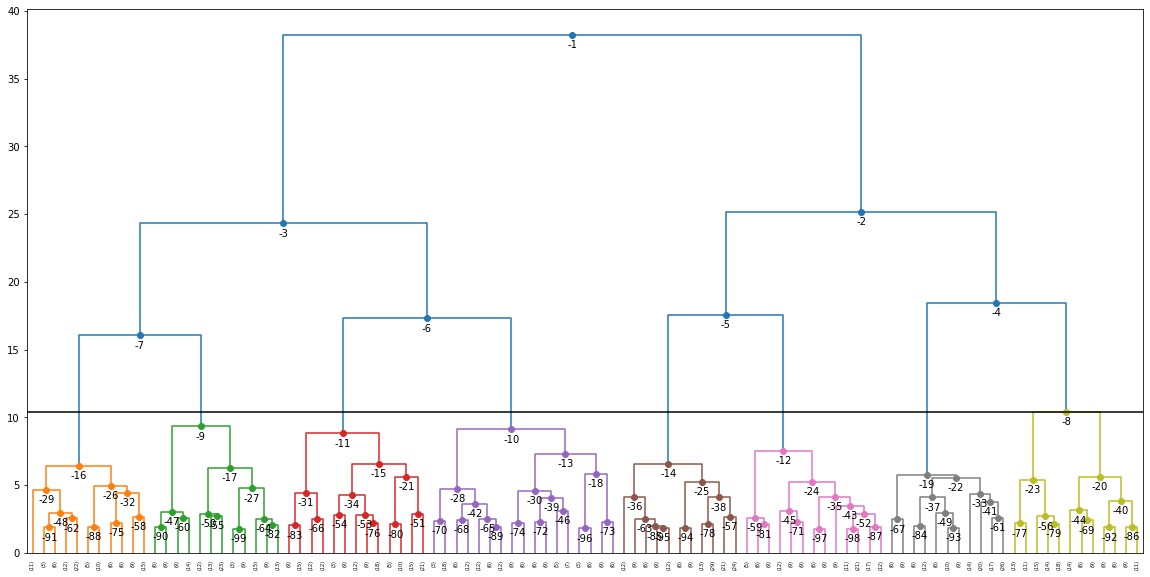

In [27]:
# Reduced dataset
n_clusters=8

model = AgglomerativeClustering(n_clusters=n_clusters, distance_threshold=None, affinity='euclidean', linkage='ward')

y_predict_reduced = model.fit_predict(data_reduced)

print("Reduced dataset")
plot_dendrogram(model=model, X=data_reduced, truncate_mode='lastp', p=100, 
                n_clusters=n_clusters, 
                color_threshold=None)

The dendrogram shows in both original and reduced dataset that the optimal number of clusters is 8. Furthermore, the dendrogram of reduced dataset appears to be more balanced.

The dendrogram is consistent with the results of average silhouette score for agglomerative clustering performance.

### K-means Clustering

In [28]:
model = KMeans(random_state=42)
results_original_df = run_experiment(clusters, model=model, data=data)
results_pca_df = run_experiment(clusters, model=model, data=data_reduced)

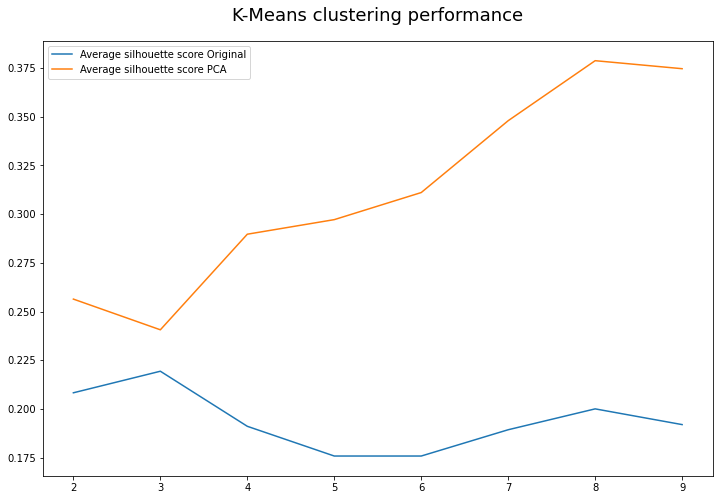

In [29]:
plt.figure(figsize=(12, 8)) 
ax = sns.lineplot(x=clusters, y=results_original_df, label='Average silhouette score Original')
ax = sns.lineplot(x=clusters, y=results_pca_df, label='Average silhouette score PCA')
ax.set_title('K-Means clustering performance', fontsize=18, pad=20)
plt.show()

We obtain the same result as before using k-means clustering.
This also suggests that it's a good practice to only focus on PCA, as it performs better in assessing the quality of the outputs, comparing the results of the two algorithms

### DBSCAN

DBSCAN is a very powerful algorithm for clustering based on the concept of density and connectivity. We will not use such algorithm for our analysis as it is suited for high density data and for problems in which the number of clusters is unknown.

In fact, the aim of our project is to verify that the original specified classes are found also with unsupervised techniques.
Furthermore, the algorithm fails at high dimensional data, which is the case of our datasets, both original and reduced dataset.


## Clustering Metrics

### Cluster validity via correlation

We define the **incidence matrix** as an $N \times N$ matrix (where N is the number of sampes) having a $1$ in position $(i, j)$ if the samples $i$ and $j$ have the same *predicted* cluster id. 

We define the **similarity matrix** as an $N \times N$ matrix containing the similarity ($1 - distance$) between each pair of points

The **clustering correlation** is defined as the correlation (normalized dot product, or cosine similairty) between these matrices, seen as two vectors!

In [30]:
# Models
model_agg = AgglomerativeClustering(n_clusters=8, affinity='euclidean', linkage='ward')
y_pr_agg_orig = model.fit_predict(data)
y_pr_agg_red = model.fit_predict(data_reduced)

model_km = KMeans(n_clusters=8, random_state=42)
y_pr_km_orig = model.fit_predict(data)
y_pr_km_red = model.fit_predict(data_reduced)

In [31]:
from sklearn.metrics import pairwise_distances
from sklearn.preprocessing import normalize

def incidence_mat(y_pred):
    npoints = y_pred.shape[0]
    mat = np.zeros([npoints, npoints])
    # Retrieve how many different cluster ids there are
    clusters = np.unique(y_pred)
    nclusters = clusters.shape[0]
    
    for i in range(nclusters):
        sample_idx = np.where(y_pred == i) #indices of the samples in this cluster
        # Compute combinations of these indices
        xx, yy = np.meshgrid(sample_idx, sample_idx)
        mat[xx, yy] = 1
        
    return mat

def similarity_mat(X, metric):
    dist_mat = pairwise_distances(X, metric=metric)
    min_dist, max_dist = dist_mat.min(), dist_mat.max()
    
    # Normalize distances in [0, 1] and compute the similarity
    sim_mat = 1 - (dist_mat - min_dist) / (max_dist - min_dist)
    return sim_mat

def correlation(X, y_pred, metric):
    inc = incidence_mat(y_pred)
    sim = similarity_mat(X, metric)
    
    inc = normalize(inc.reshape(1, -1))
    sim = normalize(sim.reshape(1, -1))
    corr = inc @ sim.T
    
    return corr[0,0]   

In [32]:
n_clusters=8
y_rand = np.random.randint(0, n_clusters, y.shape[0])

In [33]:
print("Random Clustering correlation for Original data: ", correlation(data, y_rand, 'euclidean'))
print("Agglomarative Clustering correlation for Original data: ", correlation(data, y_pr_agg_orig, 'euclidean'))
print("K-means Clustering correlation for Original data: ", correlation(data, y_pr_km_orig, 'euclidean'))

Random Clustering correlation for Original data:  0.3505430454627369
Agglomarative Clustering correlation for Original data:  0.41890281593698875
K-means Clustering correlation for Original data:  0.41890281593698875


In [34]:
print("Random Clustering correlation for Reduced data: ", correlation(data_reduced, y_rand, 'euclidean'))
print("Agglomerative Clustering correlation for Reduced data: ", correlation(data_reduced, y_pr_agg_red, 'euclidean'))
print("K-means Clustering correlation for Reduced data: ", correlation(data_reduced, y_pr_km_red, 'euclidean'))

Random Clustering correlation for Reduced data:  0.3455287851378738
Agglomerative Clustering correlation for Reduced data:  0.4852157142039299
K-means Clustering correlation for Reduced data:  0.4852157142039299


These results show that considering the reduced dataset increases the clustering correlation.

### Similarity matrix

Since the correlation results are the same for Agglomerative clustering and K-means, we will only show the similarity matrices for agglomerative clustering, for both original and reduced dataset.

In [35]:
def sorted_mat(sim, y_pred):
    idx_sorted = np.argsort(y_pred)
    # Sort the rows
    sim = sim[idx_sorted,:]
    # Sort the columns
    sim = sim[:, idx_sorted]
    
    return sim

def plot_sorted_mat(sim, y_pred):
    sim = sorted_mat(sim, y_pred)
    
    fig, ax = plt.subplots(figsize=(40,30))  
    ax = sns.heatmap(sim, ax=ax)
    # Remove ruler (ticks)
    ax.set_yticks([]) 
    ax.set_xticks([])

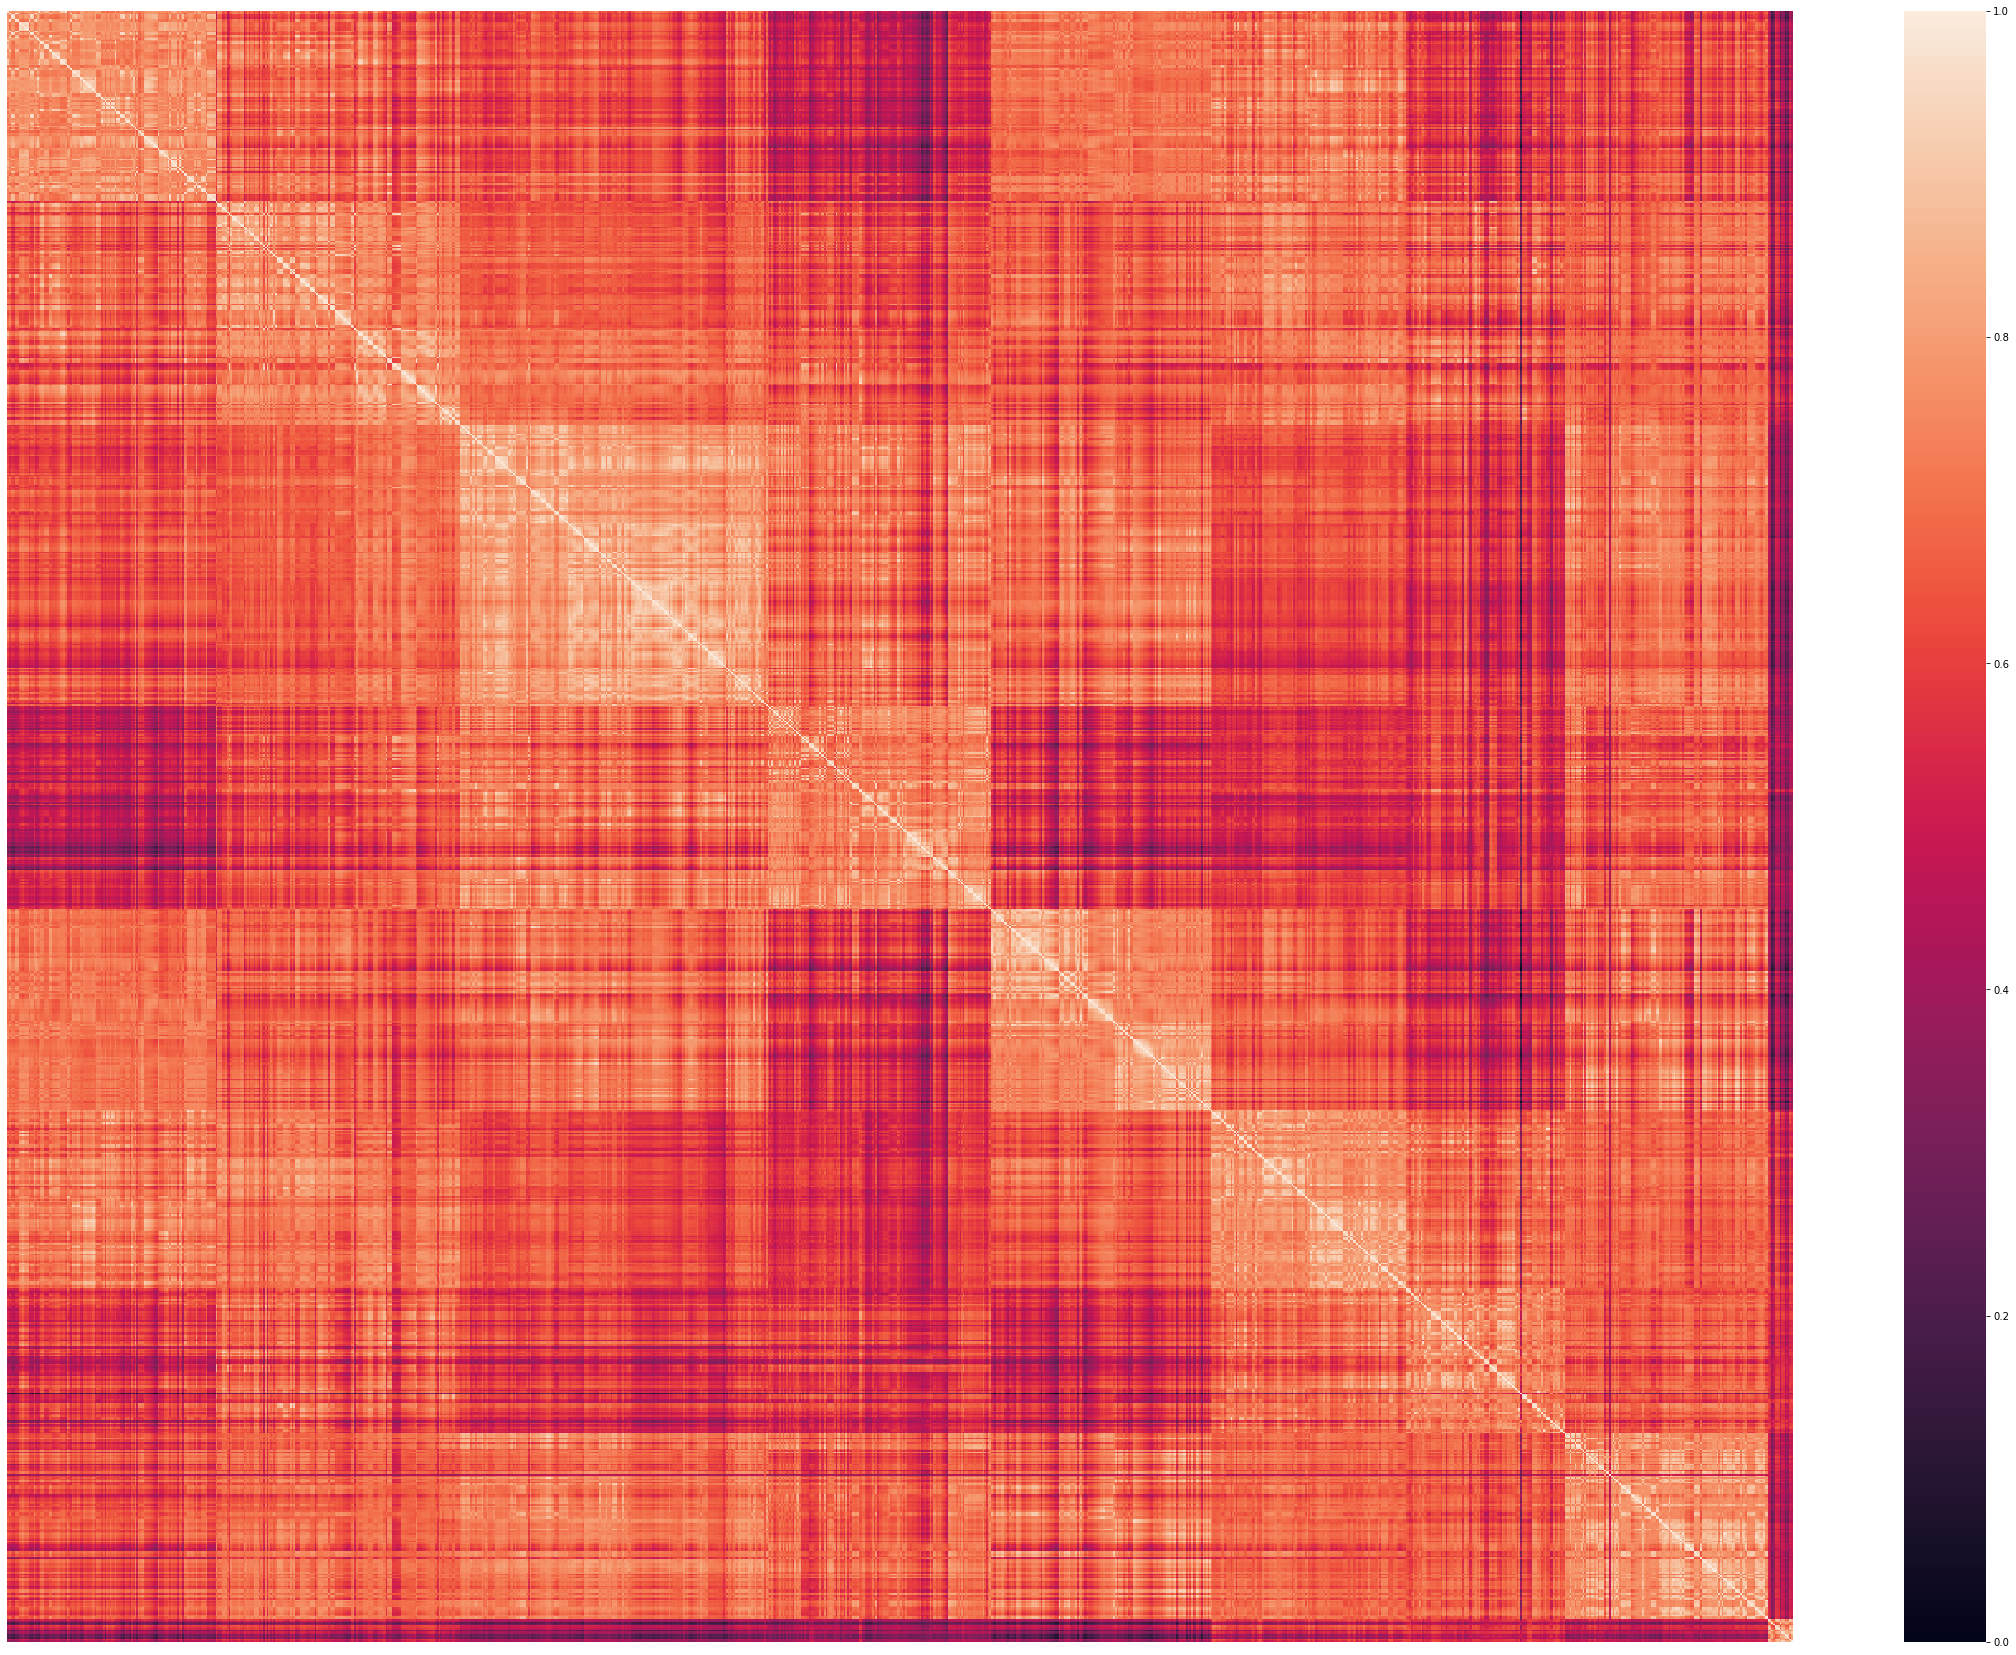

In [36]:
# Original dataset
sim = similarity_mat(data, 'euclidean')
plot_sorted_mat(sim, y_pr_agg_orig)

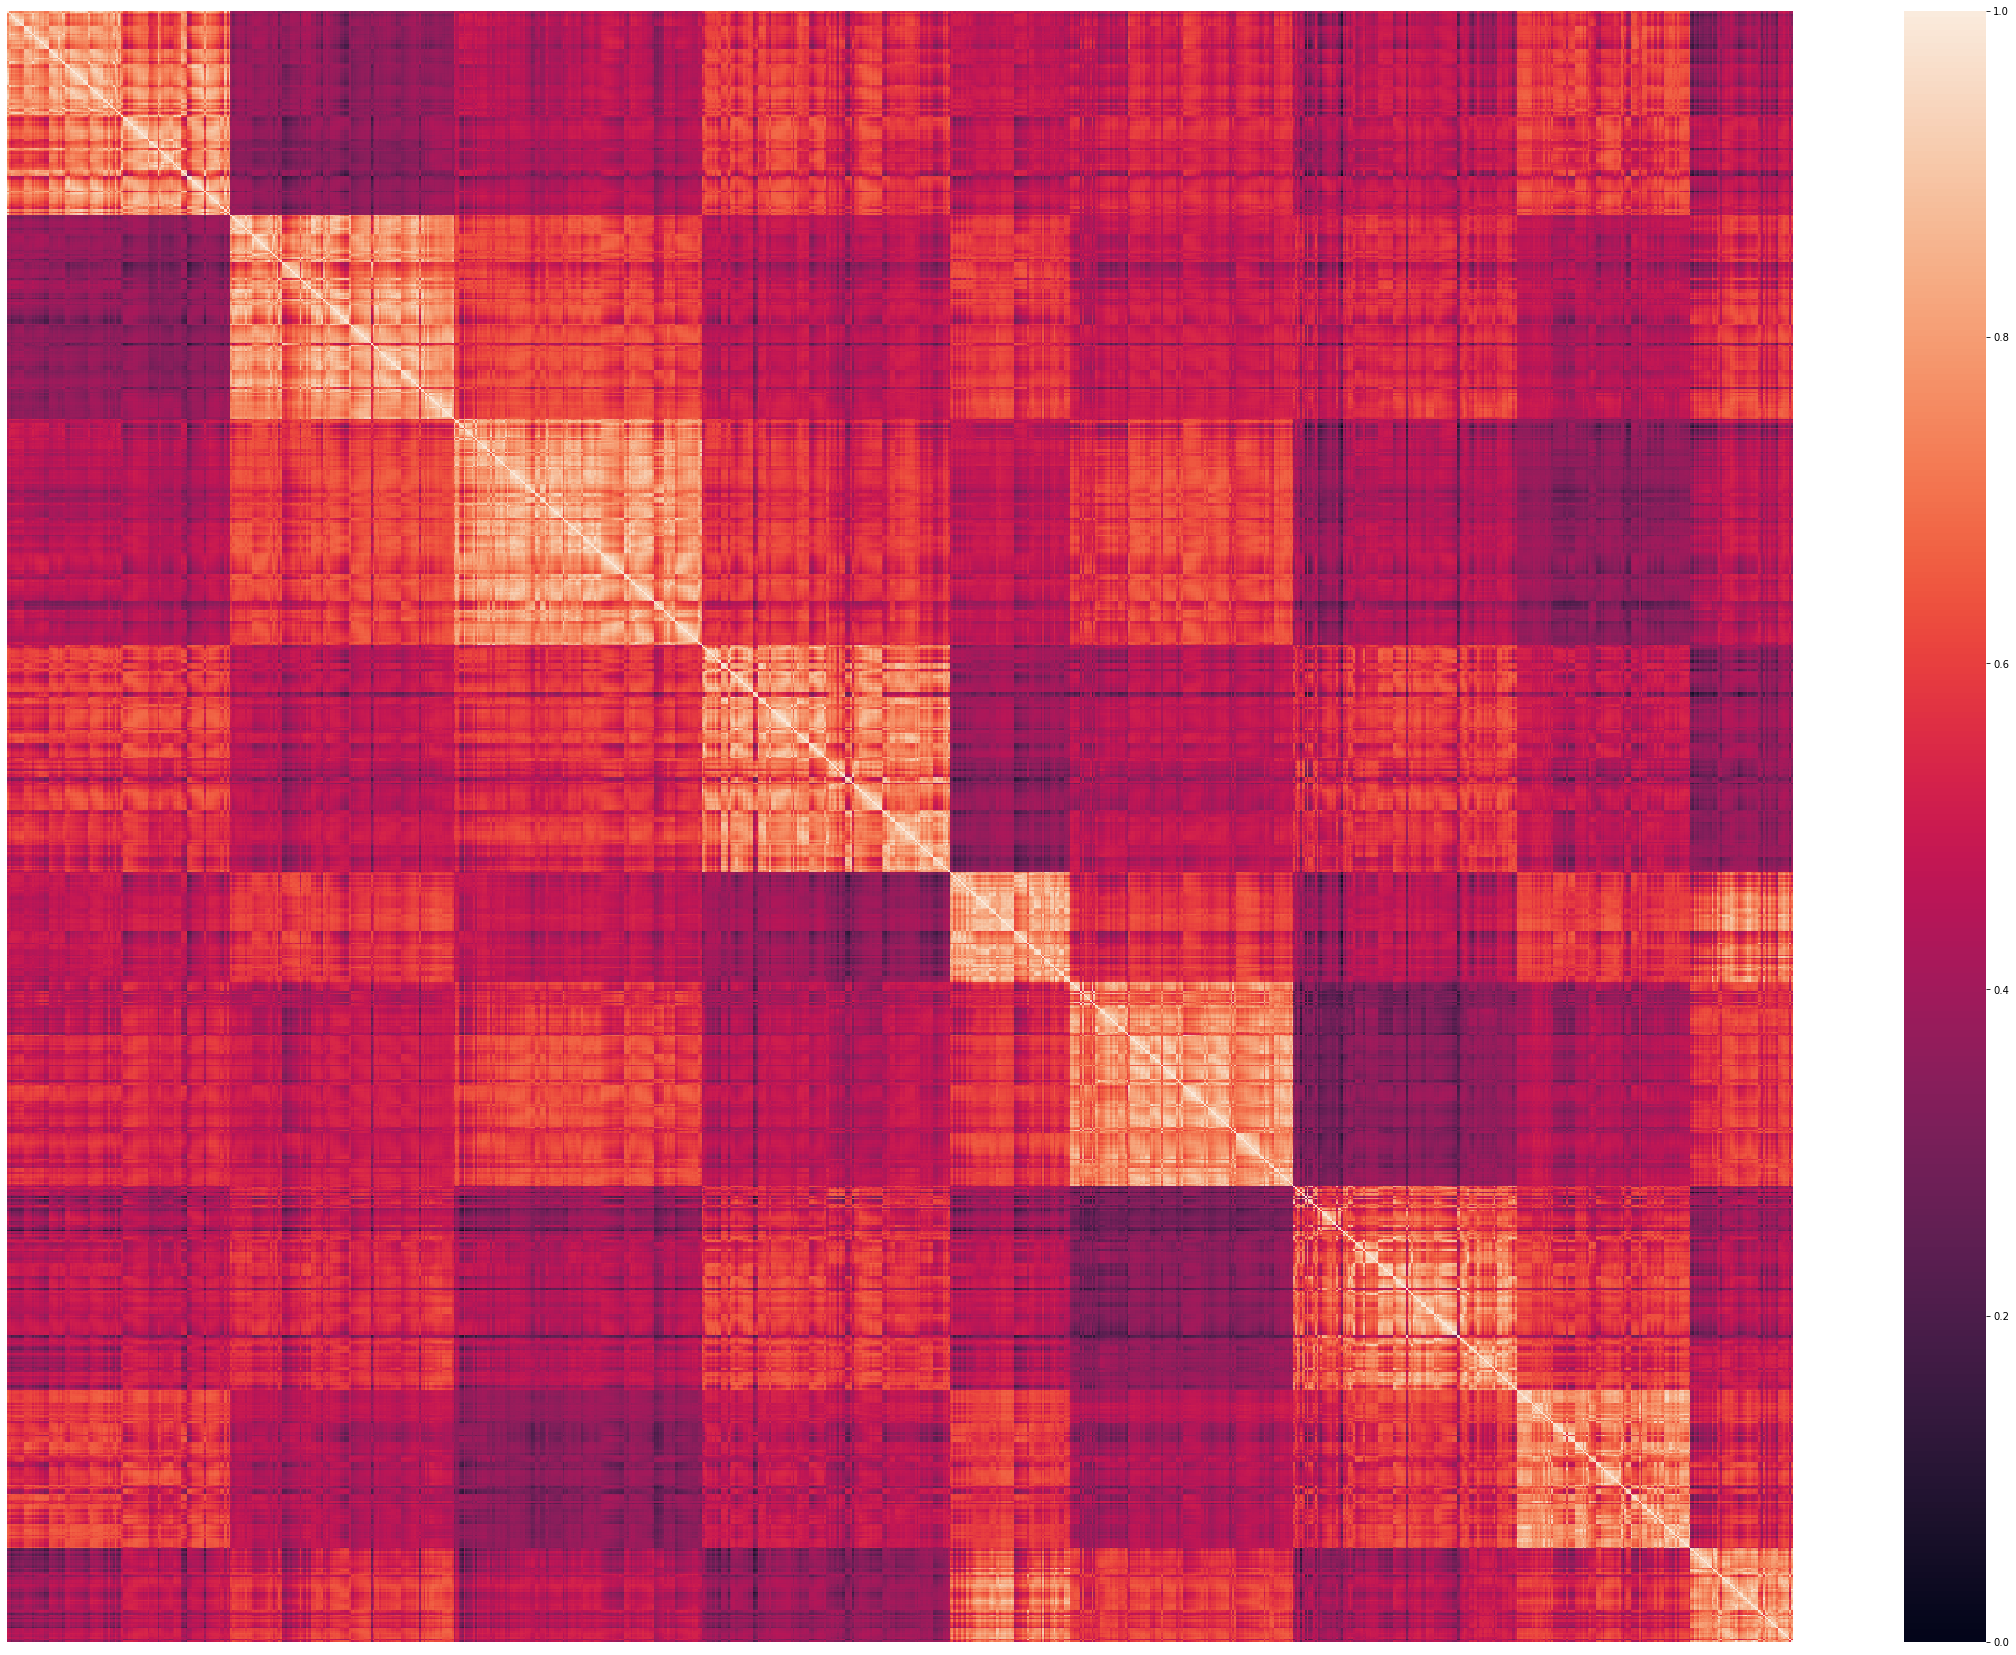

In [37]:
# Reduced dataset
sim = similarity_mat(data_reduced, 'euclidean')
plot_sorted_mat(sim, y_pr_agg_red)

We can observe that the similarity matrix is better in the case of reduced dataset.

### Precision, Recall and Purity

These metrics can be computed only if, as in this case, the underlying true cluster assignments are known.

In [38]:
def get_Ncounts(y_predict, y_true, k, j=None):
    N = y_true.shape[0]
    Nk_mask = y_predict == k
    Nk = Nk_mask.sum()
    Nj, Nkj = None, None
    if j is not None:
        Nj_mask = y_true == j
        Nj = Nj_mask.sum()
        Nkj = np.logical_and(Nj_mask, Nk_mask).sum()
    return N, Nk, Nj, Nkj

def precision(y_predict, y_true, k, j):
    N, Nk, Nj, Nkj = get_Ncounts(y_predict, y_true, k, j)
    return Nkj / (Nk + 1e-8)
    
def recall(y_predict, y_true, k, j):
    N, Nk, Nj, Nkj = get_Ncounts(y_predict, y_true, k, j)
    return Nkj / (Nj + 1e-8)

def F(y_predict, y_true, k, j):
    p = precision(y_predict, y_true, k, j)
    r = recall(y_predict, y_true, k, j)
    return (2*p*r) / (p+r)

def purity(y_predict, y_true, k):
    cls = np.unique(y_true)
    prec = [precision(y_predict, y_true, k, j) for j in cls]
    return max(prec)

def tot_purity(y_predict, y_true):
    N = y_true.shape[0]
    nc = len(np.unique(y_true))
    p = 0
    for k in range(nc):
        N, Nk, _, _ = get_Ncounts(y_predict, y_true, k)
        pk = purity(y_predict, y_true, k)
        p += (Nk / N) * pk
    return p

In [39]:
print("Random purity", tot_purity(y_rand, y))
print("Predicted purity of Agglomerative clustering on original dataset:", tot_purity(y_pr_agg_orig, y))
print("Predicted purity of K-means clustering on original dataset:", tot_purity(y_pr_km_orig, y))

Random purity 0.16944444443181284
Predicted purity of Agglomerative clustering on original dataset: 0.46388888885441926
Predicted purity of K-means clustering on original dataset: 0.46388888885441926


In [40]:
print("Random purity", tot_purity(y_rand, y))
print("Predicted purity of Agglomerative clustering on reduced dataset:", tot_purity(y_pr_agg_red, y))
print("Predicted purity ofn K-means clustering on reduced dataset:", tot_purity(y_pr_km_red, y))

Random purity 0.16944444443181284
Predicted purity of Agglomerative clustering on reduced dataset: 0.9425925925185186
Predicted purity ofn K-means clustering on reduced dataset: 0.9425925925185186


These results show that considering the reduced dataset considerably increases the predicted purity.

# 5. Results, discussion and conclusion

The results show that both Hierarchical and K-means Clustering techniques suggest 8 clusters as best silhouette score.\
However, it could be the case that even with 8 clusters (which are consistent with the number of real classes), the quality of the clustering is not optimal.

For example, an identified cluster could contain more "real" classes", resulting in a less useful modelling for practical application.

We will then check if this is the case:

In [41]:
model_agg = AgglomerativeClustering(n_clusters=8, affinity='euclidean', linkage='ward')
model_k = KMeans(n_clusters=8)

y_predict_agg = model_agg.fit_predict(data_reduced)
y_predict_k = model_k.fit_predict(data_reduced)

In [42]:
final_df = pd.DataFrame({'truth': y, 'agglomerative': y_predict_agg, 'kmeans': y_predict_k})
final_df

truth  agglomerative  kmeans
0         0              6       1
1         0              6       1
2         0              6       1
3         0              6       1
4         0              6       1
...     ...            ...     ...
1075      6              0       7
1076      6              0       7
1077      6              0       7
1078      6              0       7
1079      6              0       7

[1080 rows x 3 columns]

In [43]:
final_df.groupby('truth')[['agglomerative', 'kmeans']].agg(set)

agglomerative kmeans
truth                     
0               {6}    {1}
1               {5}    {6}
2               {1}    {5}
3               {3}    {2}
4               {2}    {4}
5               {4}    {0}
6               {0}    {7}
7               {7}    {3}

We can see from the results that (fortunately) this is not the case, and that our approaches can picture the nature of the classes in an optimal way, being able to precisely "classify" our data in an usupervised way.

In fact, every cluster has a 1:1 correspondence with the truth originally contained in the dataset.

We can thus conclude that the chosen approaches are both valid.

### Further steps


To better understand the nature of the results, one could further inspect the importance of the features.
There probably are features that can better explain the classes subdivision, given that it is quite easy to distinguish them with unsupervised methods.